# Arbres binaires de recherche

## Première implémentation : en créant deux classes ad hoc

Complétez la classe Noeud qui permet de créer des arbres avec la classe Arbre Pensez récursif.

In [16]:
from graphviz import Digraph

class Noeud:
    """
    Un noeud a une valeur et pointe vers deux autres noeuds (petit et
    grand) ou éventuellement le vide.
    On insère de nouvelles valeurs en partant de la racine du noeud et
    en bifurquant selon la comparaison avec la valeur du noeud.

    """

    def __init__(self, val):
        """
        Un noeud a toujours une valeur mais pointe vers un autre noeud
        ou éventuellement le vide (None)
        """
        self.__val = val
        self.__grand = None
        self.__petit = None

    def insere(self:"Noeud", val:"T"):
        if val < self.__val :
            if self.__petit is None:
                self.__petit = Noeud(val)
            else:
                self.__petit.insere(val)
        elif val > self.__val:
            if self.__grand is None:
                self.__grand = Noeud(val)
            else:
                self.__grand.insere(val)
        else:
            pass
            
    def hauteur(self) -> int:
        """
        Nombre de niveaux de l'arbre
        """
        if self.__petit is None and self.__grand is None:
            return 0
        elif self.__petit is None:
            return 1 + self.__grand.hauteur()
        elif self.__grand is None:
            return 1 + self.__petit.hauteur()
        else:
            return max(1 + self.__petit.hauteur(), 1 + self.__grand.hauteur())

    def nb_noeuds(self) -> int:
        if self.__petit is None and self.__grand is None:
            return 1
        elif self.__petit is None:
            return 1 + self.__grand.nb_noeuds()
        elif self.__grand is None:
            return 1 + self.__petit.nb_noeuds()            
        else:
            return (1 + self.__petit.nb_noeuds()) + self.__grand.nb_noeuds()

    def est_feuille(self) -> bool:
        return self.__petit is None and self.__grand is None

    def nb_feuilles(self) -> int:
        if self.est_feuille():
            return 1
        elif self.__petit is None:
            return self.__grand.nb_feuilles()
        elif self.__grand is None:
            return self.__petit.nb_feuilles()
        else:
            return self.__petit.nb_feuilles() + self.__grand.nb_feuilles()
    
    def contient(self, v, cpt=0) -> bool:
        """
        Est-ce que v est une valeur contenue dans Noeud
        """
        if self.__val == v:
            print(f'En {cpt} coups')
            return True
        elif self.__val > v and self.__petit:
            return self.__petit.contient(v, cpt+1)
        elif self.__val < v and self.__grand:
            return self.__grand.contient(v, cpt+1)
        else:
            print(f'En {cpt} coups')
            return False

    def visite_pre(self) -> None:
        """
        Que fait ce code ? => Il parcourt l'arbre en profondeur avec le parcours préfixe
        Expliquez la différence avec les deux suivants => parcours préfixe : on note le sommet quand on passe à sa gauche
        """
        print(self.__val) #écrit la valeur du noeud sur lequel on se situe dans l'arbre
        for cote in [self.__petit, self.__grand]: #self.__petit et self.__grand seront utlisées avec le nom de "cote"
            if cote is not None: #si self a au moins un enfant:
                cote.visite_pre() #on relance la fonction "visite_pre" avec cet enfant (puis le deuxième s'il y a deux enfants ou                                        aucun si self est une feuille)

    def visite_post(self) -> None:
        """
        parcourt postfixe => on parcourt l'arbre en profondeur et on note le sommet quand on passe à sa droite
        """
        for cote in [self.__petit, self.__grand]: #chaque enfant prendra comme nom "cote" dans la boucle
            if cote is not None: #pour chaque enfant de self (si self n'a pas d'enfant, ne fait rien):
                cote.visite_post() #on recommence la fonction jusqu'à ce qu'on arrive à une feuille
        print(self.__val) #on écrit la valeur du noeud sur lequel on est

    def visite_inf(self) -> None:
        """
        parcourt infixe => on parcourt l'arbre en profondeur et on note le sommet quand on passe en dessous
        """
        if self.__petit is not None: #si self a un élément plus petit que lui
            self.__petit.visite_inf() #on recommence la fonction avec cet élément
        print(self.__val) #on écrit la valeur du noeud sur lequel on est
        if self.__grand is not None: #si self a un élément plus grand que lui
            self.__grand.visite_inf() #on recommence la fonction avec la valeur de cet élément

    def visite_niveau(self) -> None:
        """
        On veut obtenir les noeuds par niveau i.e. classés dans l'ordre 
        croissant des distances à la racine aka parcours en largeur 
        """
        print(self.__val)
        if self.__petit and self.__grand is None:
            return self.__petit.visite_niveau()
        elif self.__grand and self.__petit is None:
            return self.__grand.visite_niveau()
        elif self.__petit and self.__grand:
            return self.__petit.visite_niveau() or self.__grand.visite_niveau()
        else:
            pass

    def mini(self):
        """
        La plus petite valeur 
        """
        if self.est_feuille or self.__petit is None:
            return self.__val
        else:
            return self.__petit.mini()

    def maxi(self):
        """
        la plus grande valeur
        """
        if self.est_feuille() or self.__grand is None:
            return self.__val
        else:
            return self.__grand.maxi()

    #  Outils de représentation
    
    def viz(self):
        s = Digraph()
        def tree2viz(self):
            """
            À compléter...
            """
            v = self.__val
            if self.__petit:
                p = self.__petit.__val
            if self.__grand:
                g = self.__grand.__val
            if self.__petit and self.__grand:
                s.node(f'{p}', style='filled',fillcolor='cadetblue3')
                s.node(f'{g}', style='filled',fillcolor='orange')
                s.edge(f'{v}', f'{p}')
                s.edge(f'{v}', f'{g}')
                tree2viz(self.__petit)
                tree2viz(self.__grand)
            elif self.__petit and not self.__grand:
                s.node(f'{p}', style='filled',fillcolor='cadetblue3')
                s.edge(f'{v}', f'{p}')
                s.node(f'nullg{v}',shape='point')
                s.edge(f'{v}', f'nullg{v}')
                tree2viz(self.__petit)
            elif self.__grand and not self.__petit:
                s.node(f'nullg{v}',shape='point')
                s.edge(f'{v}', f'nullg{v}')
                s.node(f'{g}', style='filled',fillcolor='orange')
                s.edge(f'{v}', f'{g}')
                tree2viz(self.__grand)
            else:
                s.node(f'nullg{v}',shape='point')
                s.edge(f'{v}', f'nullg{v}')
                s.node(f'nullp{v}',shape='point')
                s.edge(f'{v}', f'nullp{v}')
        tree2viz(self)
        return s

    def affiche(self):
        """
        """
        s = self.viz()
        s.graph_attr['ordering']='out'
        return s
    
    ## OPTIONNEL : utilisez turtle pour créer la représentation des arbres et/ou networks


In [17]:
N = Noeud(1);N.insere(2);N.insere(4);N.insere(3);N.insere(10);N.insere(6)

In [18]:
N.visite_niveau()

1
2
4
3
10
6


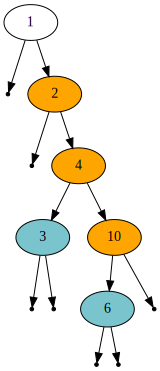

In [4]:
N.affiche()

In [43]:
class Arbre:
    """
    Arbre binaire de recherche constitué de noeuds.
    Reprend les méthodes de la classe Noeud en incluant le cas vide
    et en construisant un arbre à partir d'un noeud.
    """

    def __init__(self) -> None:
        """
        Constructeur : un arbre est vide ou constitué de noeuds
        """
        self.__data = None

    def est_vide(self) -> bool:
        """
        Testeur : vérifie si un arbre est vide
        """
        return self.__data is None

    def insere(self, val) -> None:
        """
        Insère un élément comparable dans un arbre selon le critère
        choisi pour les noeuds.
        Si l'arbre est vide, crée le noeud-data
        """
        if self.__data is None:
            self.__data = Noeud(val)
        else:
            self.__data.insere(val)

    def hauteur(self) -> int:
        if self.__data is None:
            return 0
        else:
            return self.__data.hauteur()

    def nb_noeuds(self) -> int:
        if self.__data is None:
            return 0
        else:
            return self.__data.nb_noeuds()

    def est_feuille(self) -> bool:
        if self.__data is None:
            return False
        else:
            return self.__data.est_feuille()

    def nb_feuilles(self) -> int:
        if self.__data is None:
            return 0
        else:
            return self.__data.nb_feuilles()

    def contient(self, v) -> bool:
        if self.__data is None:
            return False
        return self.__data.contient(v)

    def visite_pre(self) -> None:
        if self.__data:
            self.__data.visite_pre()

    def visite_post(self) -> None:
        if self.__data:
            self.__data.visite_post()

    def visite_inf(self) -> None:
        if self.__data:
            self.__data.visite_inf()

    def visite_inf_imp(self) -> None:
        if self.__data:
            self.__data.visite_inf_imp()

    def visite_niveau(self) -> None:
        if self.__data:
            self.__data.visite_niveau()

    def mini(self):
        assert self.__data, 'Arbre vide ! Pas de minimum'
        return self.__data.mini()

    def maxi(self):
        assert self.__data, 'Arbre vide ! Pas de maximum'
        return self.__data.maxi()

    def affiche(self) -> None:
        assert self.__data, 'Arbre vide'
        return self.__data.affiche()

    def __str__(self) -> str:
        if self.__data is None:
            return 'Arbre_Vide'
        else:
            return self.__data.__str__()

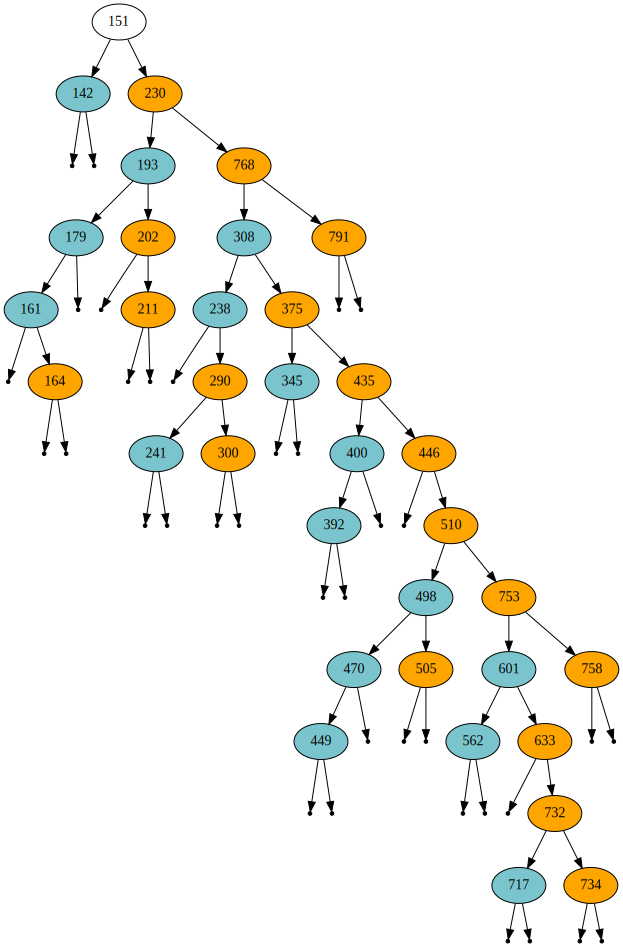

In [121]:
import random

A = Arbre()

for k in random.sample(range(100,800), 35):
    A.insere(k)
    
A.affiche()

In [122]:
from urllib.request import urlretrieve
import re

urlretrieve('https://www.gutenberg.org/files/2650/2650-0.txt', 'swann.txt')
fic = open('swann.txt', 'r').read()
texte = re.sub('[^A-ZÉÈÀÙÊÔÂÜÛÏÎa-zéèàùêôâüûïî]+', ' ', fic)
mots = {m.lower() for m in texte.split()}

sw = Arbre()
for mot in mots:
    sw.insere(mot)

In [123]:
sw.hauteur()

34

In [124]:
sw.nb_feuilles()

5237

In [125]:
sw.nb_noeuds()

15731

In [126]:
sw.contient('madeleine')

En 16 coups


True

In [128]:
sw.contient('binaire')

En 17 coups


False

## Autre implémentation : avec des dictionnaires

Un arbre serait un dictionnaire {Parent:(petit, grand)}. Comment obtenir les mêmes résultats que précédemment ?

Je n'ai pas réussi, mais voici quelques unes de mes pistes de réflexion :

In [55]:
def arbre_dict(arbre):
    A = Arbre()
    for parent, enfants in arbre.items():
        A.insere(parent)
        A.insere(enfants[0])
        A.insere(enfants[1])
    return A

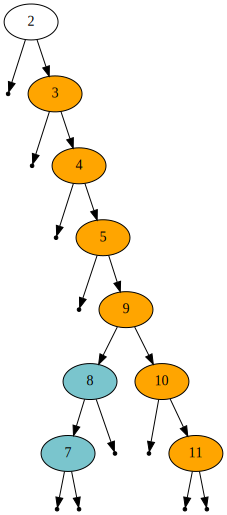

In [59]:
a = {2:(3,4), 5:(9,8), 7:(10,11)}

arbre_dict(a).affiche()

In [60]:
a = {10:(8,13), 8:(None,9), 13:(12,14), 9:(None,None), 12:(11,None), 14:(None,None), 11:(None,None)}

arbre_dict(a).affiche()

TypeError: '<' not supported between instances of 'NoneType' and 'int'

Une autre idée serait de remplacer dans la classe Noeud les enfants et la valeur, c'est à dire:
self.\__val = dictionnaire.key(); 
self.\__petit = dictionnaire.values\[0]; 
self.\__grand = dictionnaire.values\[1]

On crée un noeud pour chaque dictionnaire contenant une clé qui n'est pas déjà dans l'arbre. Si la clé d'un dictionnaire est déjà présente (donc en tant qu'enfant d'un parent), on ajoute ses enfants après cette clé.

In [77]:
def arbre_dict(arbre):
    A = Arbre()
    for i in range(len(arbre)):
        for parent, enfants in arbre[i].items():
            petit = enfants[0]
            grand = enfants[1]
            if not A.contient(parent):
                A.insere(parent)
                A.insere(petit)
                A.insere(grand)
            else:
                A.insere(petit)
                A.insere(grand)
    return A

In [78]:
a = [{10:(8,13)}, {8:(None,9)}, {13:(12,14)}, {9:(None,None)}, {12:(11,None)}, {14:(None,None)}, {11:(None,None)}]

arbre_dict(a).affiche()

En 1 coups


TypeError: '<' not supported between instances of 'NoneType' and 'int'